# Desafio 6: Preveja os usuários com alta chance de deixar seu Streaming

Por: Marcelo França Jr.

# Etapa 01 - Data Understanding

1. Carregue a base de dados;
2. Realize uma descrição estatística dos dados;
3. Verifique os tipos de dados;
4. Verifique a quantidade de valores faltantes;


In [1]:
# Importando as bibliotecas que serão usadas.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Importando os dados que serão utilizados.
df = pd.read_csv("https://www.notion.so/signed/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F9476d09e-5efc-4dee-8dd0-cbc871115ece%2Fstreaming_data.csv?table=block&id=35886d91-09b5-482b-8e57-582935ebf1d8&spaceId=6a055055-52ec-4ebb-a697-63027c951344&userId=c0845f00-59fb-4a0f-bb4a-c1e2314cd202&cache=v2",encoding='unicode_escape')


In [3]:
# Verificando as variáveis presentes no dataframe.
df.head(-1)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f
...,...,...,...,...,...,...,...,...,...,...
77878,47.0,Female,8334.0,2.0,Standard,NaN,1,1.65,0.0,e6e5b662-e9a1-4b44-bebe-e72e5ea168b2
77879,45.0,Male,NaN,NaN,Basic,NaN,5,2.20,0.0,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,NaN,Premium,NaN,2,4.54,0.0,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,NaN,5.0,Premium,NaN,1,4.34,1.0,a7d5ed26-78a4-4e70-bd04-0fec883e56aa


Variável Target:
*   Churned - Cliente deu churn ou não.

Variáveis numéricas:
*   Age - Idade do cliente.
*   Time_on_platform - Tempo do cliente na plataforma.
*   Devices_connected -  Quantidade de dispositivos conectados a conta.
*   Num_streaming_services - Quantidade de serviços de streaming que o cliente possui.
*   Num_active_profiles - Número de perfis ativos na plataforma.
*   Avg_rating - Avaliação média dos conteúdos da plataforma.

Variáveis categóricas:
*   Gender - Gênero do cliente.
*   Subscription_type - Tipo de assinatura.
*   User_id -  Código de identificação do cliente.


In [4]:
# Verificando a quantidade total de linhas e os tipos de dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [5]:
# Verificando a quantidade de nulos por coluna.
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

# Etapa 02 - Data Preparation
1. Substituir valores “NaN” por 0 Colunas → Time_on_platform,
Num_streaming_services, Churned, Avg_rating, Devices_connected
2. Dropar linhas nulas nas colunas Gender, Subscription_type e Age
3. Transformando valores churned 0 e 1 por No e Yes
4. Transformando valores floats em valores inteiros

In [6]:
# Drop da coluna 'User_id', pois cada cliente tem um código diferente.
df.drop(columns=['User_id'], inplace = True)

In [7]:
# Drop de todas as linhas em que há nulos nas colunas 'Gender', 'Subscription_type' e 'Age'.
df.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)

In [8]:
# Restantes dos nulos são substituidos por 0.
df = df.fillna(0)

In [9]:
# Verificando a quantidade de nulos por coluna.
df.isna().sum()

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
dtype: int64

In [10]:
# Substituindo valores numéricos por categóricos na coluna 'Churned'.
df['Churned'].replace({0: 'No', 1: 'Yes'}, inplace = True)

In [11]:
# Substituindo variáveis float por int.
df[['Age', 'Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Devices_connected']] = df[['Age', 'Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Devices_connected']].astype(int)

In [12]:
# Recontagem dos números no index.
df = df.reset_index(drop=True)

In [13]:
#Verificando os dados, colunas e index ajustados.
df.head(-1)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
0,49,Male,4700,3,Basic,0,3,0,No
1,69,Female,6107,2,Standard,0,1,2,No
2,44,Male,6374,3,Premium,1,1,1,Yes
3,26,Male,0,5,Basic,0,2,0,No
4,54,Male,3024,2,Basic,0,1,0,No
...,...,...,...,...,...,...,...,...,...
36509,47,Female,8334,2,Standard,0,1,1,No
36510,45,Male,0,0,Basic,0,5,2,No
36511,47,Female,6176,0,Premium,0,2,4,No
36512,64,Female,0,5,Premium,0,1,4,Yes


In [14]:
#Verificando o númeor total de linhas, e a existência de nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36515 entries, 0 to 36514
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
dtypes: int64(6), object(3)
memory usage: 2.5+ MB


In [15]:
#Separando dados categóricos e numéricos para análise.
cat_cols = df[['Gender','Subscription_type']]
num_cols = df.drop(columns=['Churned','Gender','Subscription_type'], axis=1)

In [16]:
#Escalando os dados numéricos para a fácil visualização no 'boxplot'.
mm = MinMaxScaler()
num_cols = pd.DataFrame(mm.fit_transform(num_cols), columns=num_cols.columns)

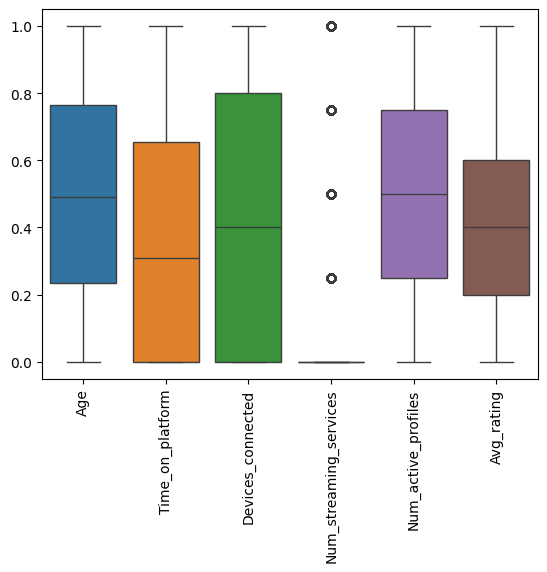

In [17]:
#Visualização da disperção dos dados numéricos.
sns.boxplot(data=num_cols)
plt.xticks(rotation=90)
plt.show()

In [18]:
#Existência de outliers na coluna 'Num_streaming_services'.
num_cols['Num_streaming_services'].value_counts()

0.00    31960
0.50     1178
0.25     1153
1.00     1118
0.75     1106
Name: Num_streaming_services, dtype: int64

In [19]:
#Drop da coluna 'Num_streaming_services'.
num_cols = num_cols.drop(columns=['Num_streaming_services'], axis=1)

# Etapa 03 - Modelagem dos Dados (Regressão Logística)
1. Definir variáveis X e y para o modelo
2. Realizar o .fit do modelo
3. Separar em train e test
4. Realizar a modelagem
5. Plotar matrix confusão
6. Printar métricas

In [20]:
#Definição da variável com os dados target (df.Churned).
y = df[['Churned']]

In [21]:
#LabelEncoder na variável target.
le = LabelEncoder()

le.fit(y)
y = le.transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [22]:
#OneHotEncoder nas variáveis categóricas, para separação de tipos por colunas.
ohe = OneHotEncoder(sparse=False)
X = pd.DataFrame(data = ohe.fit_transform(cat_cols), columns=ohe.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
#Junção dos dados categóricos(OneHotEncoder), com os dados númericos(MinMaxScaler).
X = pd.concat([X, num_cols], axis=1)

In [24]:
#Separação dos dados para treino e teste (70/30).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Regressão Logística

In [25]:
#Declaração e treinamento da Regressão Logística.
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [26]:
#Visualização dos parâmetros utilizados no treinamento.
lr.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
#Visualização dos dados teste, juntamento com a variável target e a predita.
X_test.assign(Test = y_test).assign(Pred = lr.predict(X_test)).sort_values(by='Test', ascending=False)

,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Age,Time_on_platform,Devices_connected,Num_active_profiles,Avg_rating,Test,Pred
19805,0.0,1.0,1.0,0.0,0.0,0.980392,0.973513,0.2,0.75,0.0,1,0
20361,1.0,0.0,0.0,1.0,0.0,0.862745,0.754082,0.4,0.25,0.4,1,0
23063,0.0,1.0,1.0,0.0,0.0,0.960784,0.779427,0.0,0.25,0.8,1,1
4319,1.0,0.0,0.0,0.0,1.0,0.705882,0.561708,0.0,0.25,0.8,1,0
3099,0.0,1.0,0.0,1.0,0.0,0.549020,0.257107,0.4,0.00,0.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3543,0.0,1.0,1.0,0.0,0.0,0.509804,0.591734,0.0,0.00,0.0,0,0
31141,1.0,0.0,0.0,1.0,0.0,0.294118,0.480534,0.6,1.00,0.6,0,0
5318,0.0,1.0,0.0,0.0,1.0,0.980392,0.258819,0.8,0.00,0.0,0,0
19011,1.0,0.0,1.0,0.0,0.0,0.274510,0.723713,0.4,0.00,0.2,0,0


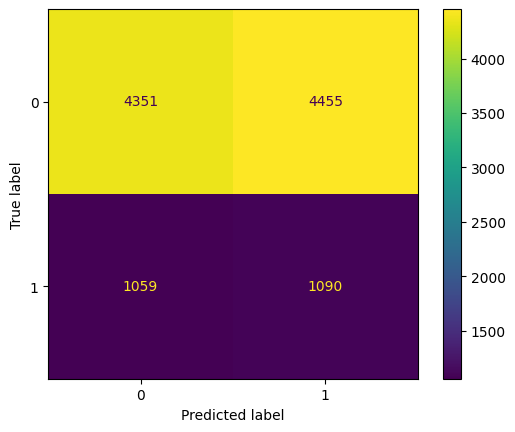

In [28]:
#Matriz de confusão para comparação aos dados reais com os preditos.
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

In [29]:
#Verificação das méticas do treinamento.
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.5055946791862285
Acurácia (Teste): 0.49666818804199
Acurácia Balanceada (Treino): 0.508705751112463
Acurácia Balanceada (Teste): 0.5006537961605982
Precision (Treino): 0.1973849044785468
Precision (Teste): 0.19657348963029755
Recall (Treino): 0.5137558589769716
Recall (Teste): 0.5072126570497906
F1-Score (Treino): 0.28519712653430623
F1-Score (Teste): 0.283337665713543
ROCAUC (Treino): 0.5121547521911722
ROCAUC (Teste): 0.5055203171153134


# Etapa 04 - Modelagem dos Dados (Tunning)

1. Definir variáveis X e y para o modelo
2. Realizar o .fit do modelo
3. Separar em train e test
4. Realizar a modelagem
5. Plotar matrix confusão
6. Printar métricas

In [30]:
#Definição de novos parâmetros para a Regressão Logística, para treinamento com foco em 'f1_score'.
parameters = {'class_weight': [None, 'balanced'],
              'penalty' : ['l2'],
              'C' : [0.0001, 0.001, 0.01, 0.1, 1],
              'solver' : ['liblinear','lbfgs']}

grid_search_lr = GridSearchCV(lr, parameters, scoring='f1', n_jobs=-1)

In [31]:
#Treinamento utilizando GridSearchCV.
lr_param = grid_search_lr.fit(X_train, y_train)

In [32]:
#Visualização dos parâmetros do melhor treinamento.
grid_search_lr.best_estimator_.get_params()

{'C': 1,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
#Regressão Logística utilizando os parâmetros otimizados.
lr_tunned = LogisticRegression( C = 0.001,
                                class_weight= 'balanced',
                                dual= False,
                                fit_intercept= True,
                                intercept_scaling= 1,
                                l1_ratio= None,
                                max_iter= 100,
                                multi_class= 'auto',
                                n_jobs= None,
                                penalty= 'l2',
                                random_state= None,
                                solver= 'liblinear',
                                tol= 0.0001,
                                verbose= 0,
                                warm_start= False)

lr_tunned.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', solver='liblinear')

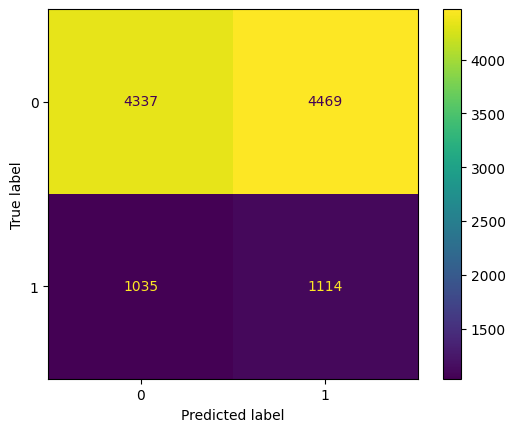

In [34]:
#Matriz de confusão para comparação aos dados reais com os preditos.
ConfusionMatrixDisplay.from_estimator(lr_tunned, X_test, y_test)

In [35]:
#Verificação das méticas do treinamento.
print(f"Acurácia (Treino): {accuracy_score(y_train, lr_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.4996870109546166
Acurácia (Teste): 0.4975810132359653
Acurácia Balanceada (Treino): 0.5090897639393943
Acurácia Balanceada (Teste): 0.5054428761556564
Precision (Treino): 0.19751285791049358
Precision (Teste): 0.19953430055525703
Recall (Treino): 0.524352965151824
Recall (Teste): 0.5183806421591438
F1-Score (Treino): 0.28694100591056093
F1-Score (Teste): 0.28815312984997415
ROCAUC (Treino): 0.5115608557685516
ROCAUC (Teste): 0.5038563008617479


# Etapa 05 - Modelagem dos Dados (Random Forest)
1. Realizar a montagem do grid search
2. Realizar o .fit do modelo
3. Realizar o Tunning
4. Realizar a modelagem
5. Plotar matrix confusão
6. Printar métricas

In [36]:
#Declaração e treinamento do RandomForest.
rf =  RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

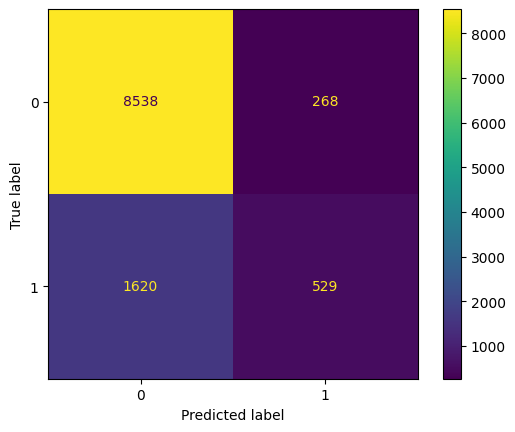

In [37]:
#Matriz de confusão para comparação aos dados reais com os preditos.
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [38]:
#Verificação das méticas do treinamento.
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9933098591549295
Acurácia (Teste): 0.8276586033774532
Acurácia Balanceada (Treino): 0.986227139568649
Acurácia Balanceada (Teste): 0.6078636049894912
Precision (Treino): 0.9902691511387164
Precision (Teste): 0.6637390213299874
Recall (Treino): 0.9747299775830446
Recall (Teste): 0.24616100511865985
F1-Score (Treino): 0.9824381226250385
F1-Score (Teste): 0.3591310251188052
ROCAUC (Treino): 0.9996978812941484
ROCAUC (Teste): 0.6615769822322801


In [39]:
#Visualização dos parâmetros utilizados no treinamento.
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [40]:
#Definição de novos parâmetros para o RandomForest, para treinamento com foco em 'f1_score'.
parameters = {'max_depth': [None,1, 2, 5, 10],
              'n_estimators': [100, 300, 500],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt']
              }

grid_search_rf = GridSearchCV(rf, parameters, scoring='f1', n_jobs=-1)

In [41]:
#Treinamento utilizando GridSearchCV.
grid_search_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 1, 2, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 300, 500]},
             scoring='f1')

In [42]:
#Visualização dos parâmetros do melhor treinamento.
grid_search_rf.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [43]:
#RandomForest utilizando os parâmetros otimizados.
rf_tunned =  RandomForestClassifier(bootstrap = False,
                                    ccp_alpha = 0.0,
                                    class_weight = None,
                                    criterion = 'gini',
                                    max_depth = None,
                                    max_features = 'auto',
                                    max_leaf_nodes = None,
                                    max_samples = None,
                                    min_impurity_decrease = 0.0,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    min_weight_fraction_leaf = 0.0,
                                    n_estimators = 500,
                                    n_jobs = -1,
                                    oob_score = False,
                                    random_state = 42,
                                    verbose = 0,
                                    warm_start = False)

In [44]:
#RandomForest utilizando os parâmetros otimizados.
rf_tunned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_features='auto', n_estimators=500,
                       n_jobs=-1, random_state=42)

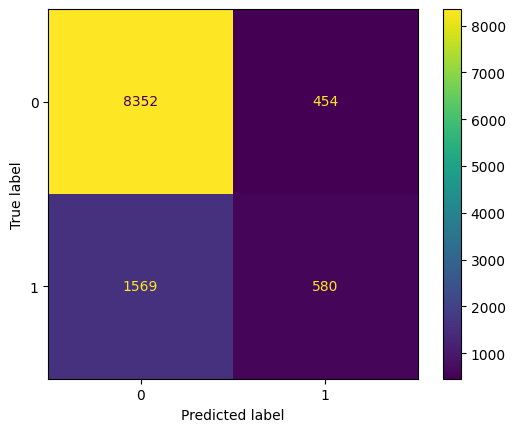

In [45]:
#Matriz de confusão para comparação aos dados reais com os preditos.
ConfusionMatrixDisplay.from_estimator(rf_tunned, X_test, y_test)

In [46]:
#Verificação das méticas do treinamento.
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9933881064162754
Acurácia (Teste): 0.8153354632587859
Acurácia Balanceada (Treino): 0.98402267356583
Acurácia Balanceada (Teste): 0.6091686080189624
Precision (Treino): 0.9966457023060796
Precision (Teste): 0.5609284332688588
Recall (Treino): 0.9688200529855309
Recall (Teste): 0.26989297347603536
F1-Score (Treino): 0.9825359098894285
F1-Score (Teste): 0.3644360666038328
ROCAUC (Treino): 0.9998539433965636
ROCAUC (Teste): 0.6874210199970471
